## 1. importing libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import eda_helper_functions

from sklearn.ensemble import IsolationForest

## 2.Read the training data

In [3]:
file_path = r"/Users/akhilkumarreddymalapati/Desktop/untitled folder/Akhil/Flight  price recomender/data/train.csv"

In [6]:
train = pd.read_csv(file_path)
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Multiple Carriers,2019-05-01,Delhi,Cochin,09:00:00,19:15:00,615,1,No Info,15373
1,Jet Airways,2019-06-06,Delhi,Cochin,19:45:00,04:25:00,520,1,No Info,14714
2,Multiple Carriers,2019-06-24,Delhi,Cochin,13:00:00,21:00:00,480,1,No Info,13587
3,Spicejet,2019-05-15,Banglore,Delhi,05:55:00,08:35:00,160,0,No check-in baggage included,3257
4,Indigo,2019-03-21,Delhi,Cochin,02:05:00,07:25:00,320,1,No Info,4862


In [7]:
train.dtypes

airline            object
date_of_journey    object
source             object
destination        object
dep_time           object
arrival_time       object
duration            int64
total_stops         int64
additional_info    object
price               int64
dtype: object

In [13]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:,col],dayfirst = True,format='mixed')
    for col in ["date_of_journey","dep_time","arrival_time"]
})


In [14]:
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Multiple Carriers,2019-05-01,Delhi,Cochin,2024-05-20 09:00:00,2024-05-20 19:15:00,615,1,No Info,15373
1,Jet Airways,2019-06-06,Delhi,Cochin,2024-05-20 19:45:00,2024-05-20 04:25:00,520,1,No Info,14714
2,Multiple Carriers,2019-06-24,Delhi,Cochin,2024-05-20 13:00:00,2024-05-20 21:00:00,480,1,No Info,13587
3,Spicejet,2019-05-15,Banglore,Delhi,2024-05-20 05:55:00,2024-05-20 08:35:00,160,0,No check-in baggage included,3257
4,Indigo,2019-03-21,Delhi,Cochin,2024-05-20 02:05:00,2024-05-20 07:25:00,320,1,No Info,4862


## 3.High level Summary

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    int64         
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), int64(3), object(4)
memory usage: 50.1+ KB


In [19]:
train.describe(include ='number')

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,621.898438,0.765625,8804.754688
std,519.685890,0.686152,4550.169389
min,75.000000,0.000000,1840.000000
25%,170.000000,0.000000,4990.000000
50%,475.000000,1.000000,7855.000000
75%,895.000000,1.000000,11802.000000
max,2280.000000,3.000000,31825.000000


In [21]:
# information about catagorical features

(
    train
    .assign(total_stops = train["total_stops"].astype(object))
    .describe(include ='O')
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640,640
unique,8,5,5,4,4
top,Jet Airways,Delhi,Cochin,1,No Info
freq,223,261,261,325,489


## 4.High level analysis of missing values

In [26]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


In [35]:
#no missing value
eda_helper_functions.plot_missing_info(train)

- check missingno library

## 5. High level analysis of outliers

- ### isolation forest algorithm
- similar to random forest

In [41]:
forest = IsolationForest(n_estimators= 100,random_state=42)

In [42]:
(
    train
    .assign(outlier = forest.fit_predict(train
                                         .drop(columns = 'price')
                                         .select_dtypes(include ='number')))
    .query("outlier == -1")
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
6,Air India,2019-03-06,Delhi,Cochin,2024-05-20 06:10:00,2024-05-20 08:15:00,1565,1,No Info,11038,-1
7,Indigo,2019-05-18,Kolkata,Banglore,2024-05-20 19:20:00,2024-05-20 23:45:00,265,1,No Info,3717,-1
9,Jet Airways,2019-05-09,Kolkata,Banglore,2024-05-20 09:35:00,2024-05-20 09:45:00,1450,1,No Info,12121,-1
21,Jet Airways,2019-05-18,Delhi,Cochin,2024-05-20 09:40:00,2024-05-20 12:35:00,1615,2,In-flight meal not included,13029,-1
22,Jet Airways,2019-05-09,Delhi,Cochin,2024-05-20 05:30:00,2024-05-20 19:00:00,810,2,In-flight meal not included,13029,-1
...,...,...,...,...,...,...,...,...,...,...,...
622,Spicejet,2019-05-06,Kolkata,Banglore,2024-05-20 09:00:00,2024-05-20 11:25:00,145,0,No Info,4174,-1
623,Jet Airways,2019-05-01,Kolkata,Banglore,2024-05-20 17:00:00,2024-05-20 09:45:00,1005,1,No Info,11467,-1
630,Jet Airways,2019-06-06,Kolkata,Banglore,2024-05-20 06:30:00,2024-05-20 20:50:00,860,2,In-flight meal not included,10118,-1
631,Indigo,2019-05-03,Chennai,Kolkata,2024-05-20 22:05:00,2024-05-20 00:25:00,140,0,No Info,5277,-1


## 6.pair plots

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


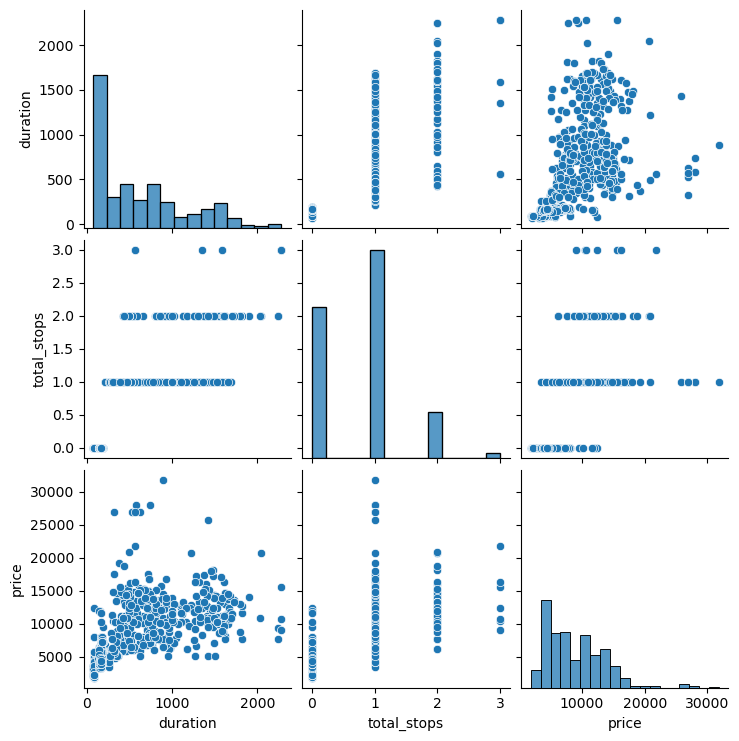

In [43]:
sns.pairplot(train)

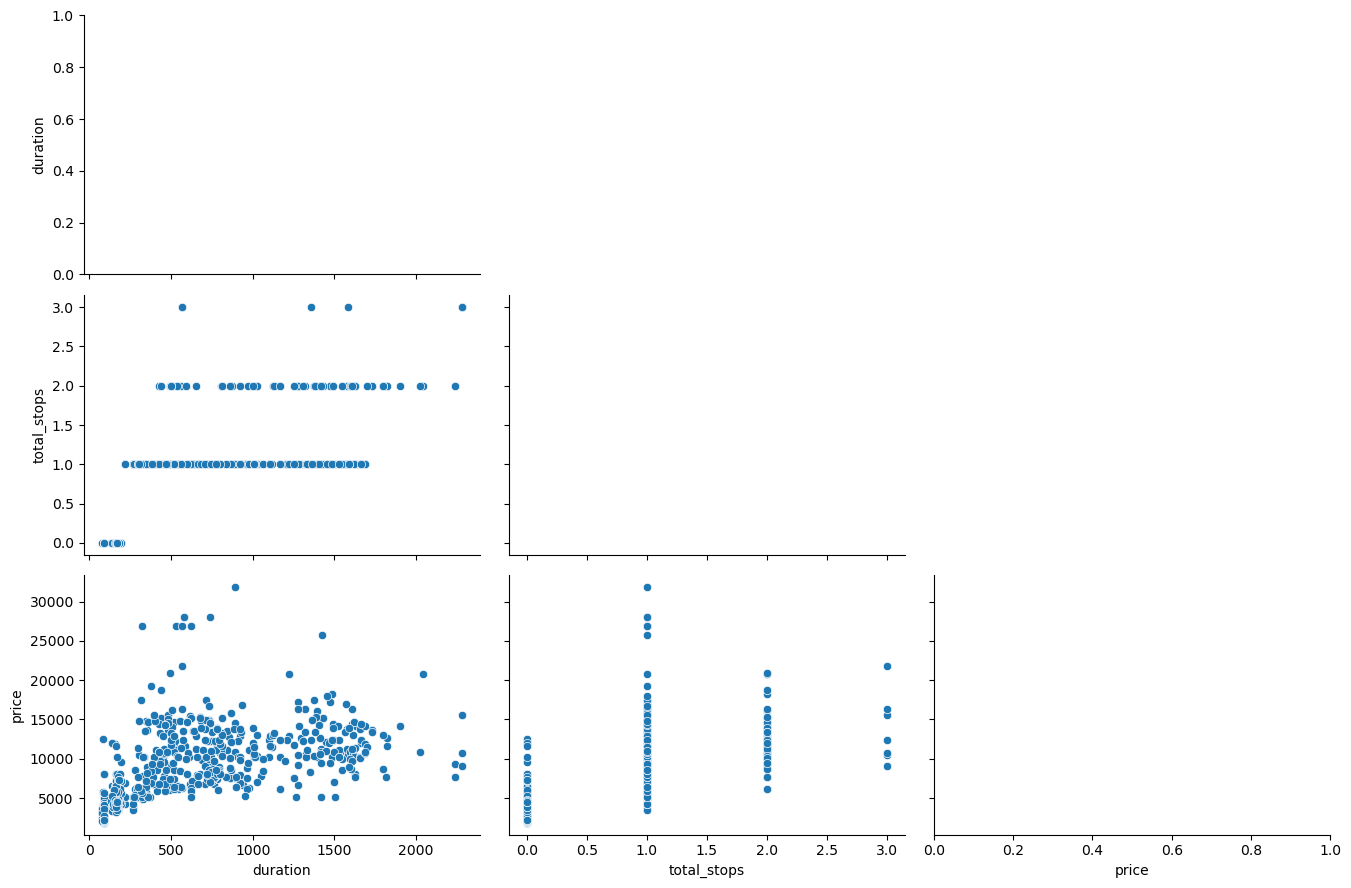

In [44]:
eda_helper_functions.pair_plots(train)

## 7.Correlation Analysis

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


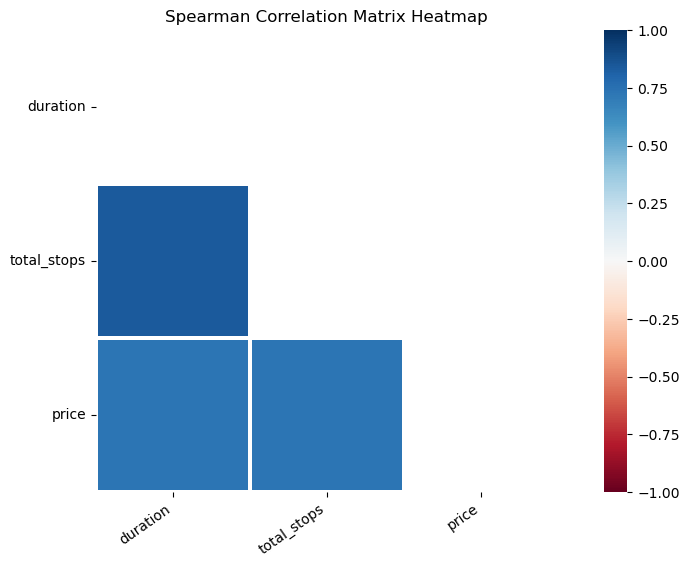

In [45]:
eda_helper_functions.correlation_heatmap(train)

In [46]:
train.corr('spearman',numeric_only = True)

,duration,total_stops,price
duration,1.000000,0.840046,0.730536
total_stops,0.840046,1.000000,0.731441
price,0.730536,0.731441,1.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


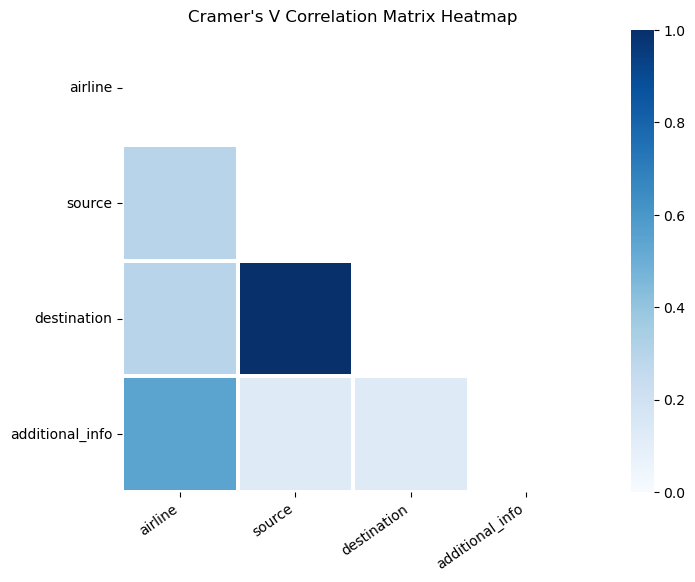

In [47]:
eda_helper_functions.cramersV_heatmap(train)